In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import *
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
from h5py import *

## Model

In [8]:
class net_CNN:
    def __init__(self,depth=3, height=64, width=64,n_classes=200,dir=r"data\ds1\CUB_200_2011\images\train"):
        self.depth=depth
        self.height=height
        self.width=width
        self.n_classes=n_classes
        self.dir=dir
        
        self.model=Sequential()
        self.model.add(layers.Conv2D(filters=20, kernel_size=(5, 5),strides=(1,1), padding='valid',input_shape=(self.height, self.width,self.depth)))
        self.model.add(layers.Activation("relu"))
        self.model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

        self.model.add(layers.Conv2D(filters=50, kernel_size=(5, 5),strides=(1,1),padding='valid'))
        self.model.add(layers.Activation("relu"))
        self.model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(500))
        self.model.add(layers.Activation("relu"))


        self.model.add(layers.Dense(self.n_classes))
        self.model.add(layers.Activation("softmax"))
        
        self.sgd = optimizers.SGD(lr=0.01)
        
    def train(self, batch_size=1024, nb_epoch=10, path_to_save_weights="weights\keras\weights_keras.h5py", loss='categorical_crossentropy', metrics=['accuracy']):
        self.model.compile(optimizer=self.sgd, loss=loss, metrics=metrics) 
        self.data_gen=ImageDataGenerator().flow_from_directory(self.dir , target_size=(self.height, self.width),batch_size=batch_size)
        self.losses=[]
        self.acc=[]
        for e in range(nb_epoch):

            batches = int(self.data_gen.samples / self.data_gen.batch_size)
        
            for i in range(batches):
                self.x,self.y = self.data_gen.next()
                self.x=self.x/255
                history = self.model.fit(self.x, self.y, verbose=0)
                print("epoch = {}/{} batch = {}/{} Loss = {}  Acc ={} ".format(e,nb_epoch,i,batches,history.history['loss'],history.history['acc']))
            self.losses.append(history.history['loss'])
            self.acc.append(history.history['acc'])
        self.model.save_weights(path_to_save_weights)  


In [ ]:
cnn=net_CNN()
cnn.train()

Found 7470 images belonging to 200 classes.
epoch = 0/10 batch = 0/7 Loss = [5.311276912689209]  Acc =[0.0048828125] 
epoch = 0/10 batch = 1/7 Loss = [5.304479166865349]  Acc =[0.0048828125] 
epoch = 0/10 batch = 2/7 Loss = [5.299108684062958]  Acc =[0.005859375] 
epoch = 0/10 batch = 3/7 Loss = [5.299204230308533]  Acc =[0.0029296875] 
epoch = 0/10 batch = 4/7 Loss = [5.301711618900299]  Acc =[0.00390625] 
epoch = 0/10 batch = 5/7 Loss = [5.295964166522026]  Acc =[0.009765625] 
epoch = 0/10 batch = 6/7 Loss = [5.2979114055633545]  Acc =[0.005859375] 
epoch = 1/10 batch = 0/7 Loss = [5.2964735536385845]  Acc =[0.006622516556291391] 
epoch = 1/10 batch = 1/7 Loss = [5.290560498833656]  Acc =[0.0078125] 
epoch = 1/10 batch = 2/7 Loss = [5.289989769458771]  Acc =[0.00390625] 
epoch = 1/10 batch = 3/7 Loss = [5.287829875946045]  Acc =[0.0107421875] 
epoch = 1/10 batch = 4/7 Loss = [5.28583587706089]  Acc =[0.0087890625] 
epoch = 1/10 batch = 5/7 Loss = [5.280382499098778]  Acc =[0.00976562

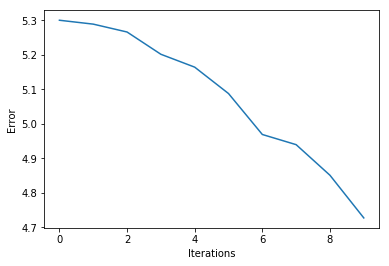

In [22]:
plt.plot(cnn.losses) 
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()

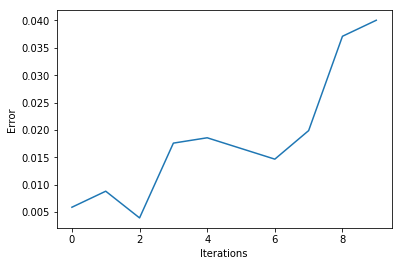

In [23]:
plt.plot(cnn.acc) 
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()